<a href="https://colab.research.google.com/github/PrajaktaGodbole/Vaccine_Acceptance_Prediction/blob/main/Vaccine_Acceptance_Prediction_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the required libraries

from pathlib import Path
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [ ]:
#Load the required data
features_df = pd.read_csv("training_set_features.csv",
    index_col="respondent_id"
)
labels_df = pd.read_csv("training_set_labels.csv",
    index_col="respondent_id"
)

In [ ]:
# Preview the features
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
features_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [ ]:
#Preview labels
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

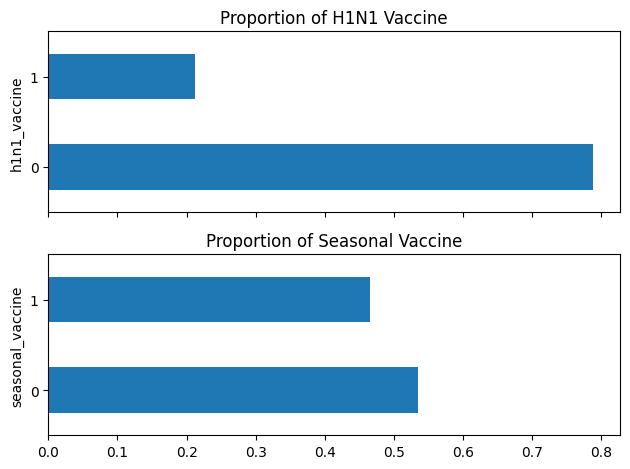

In [ ]:
#Plot the distribution of both the vaccines among people

fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [ ]:
pd.crosstab(
    labels_df["h1n1_vaccine"],
    labels_df["seasonal_vaccine"],
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [ ]:
# Phi Coefficient is the same as Pearson for two binary variables
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [ ]:
#Join the features and the label columns as one file
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


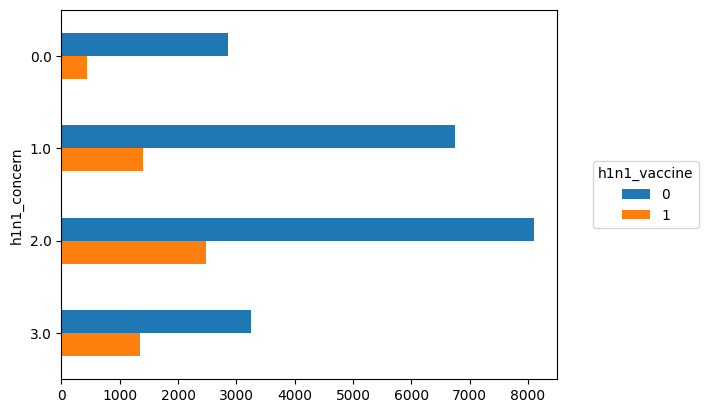

In [ ]:
#Plot the correlation of h1n1 concern with the vaccine uptake

ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    title='h1n1_vaccine'
)

In [ ]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [ ]:
#Previewing the proportion of h1n1 vaccine with its uptake
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


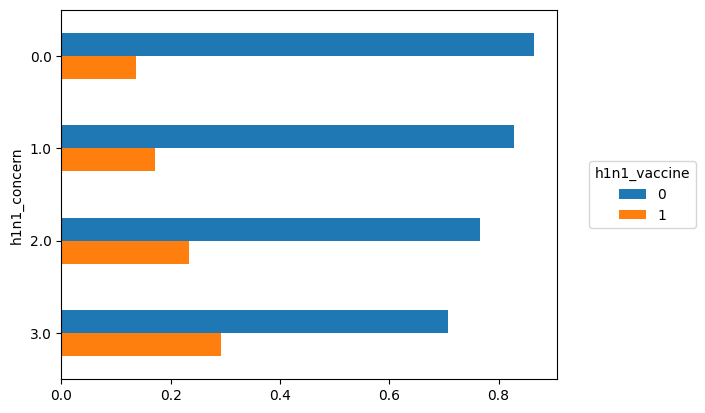

In [ ]:
# Plotting it again with a more clear representation of proportion of h1n1 vaccine uptake
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

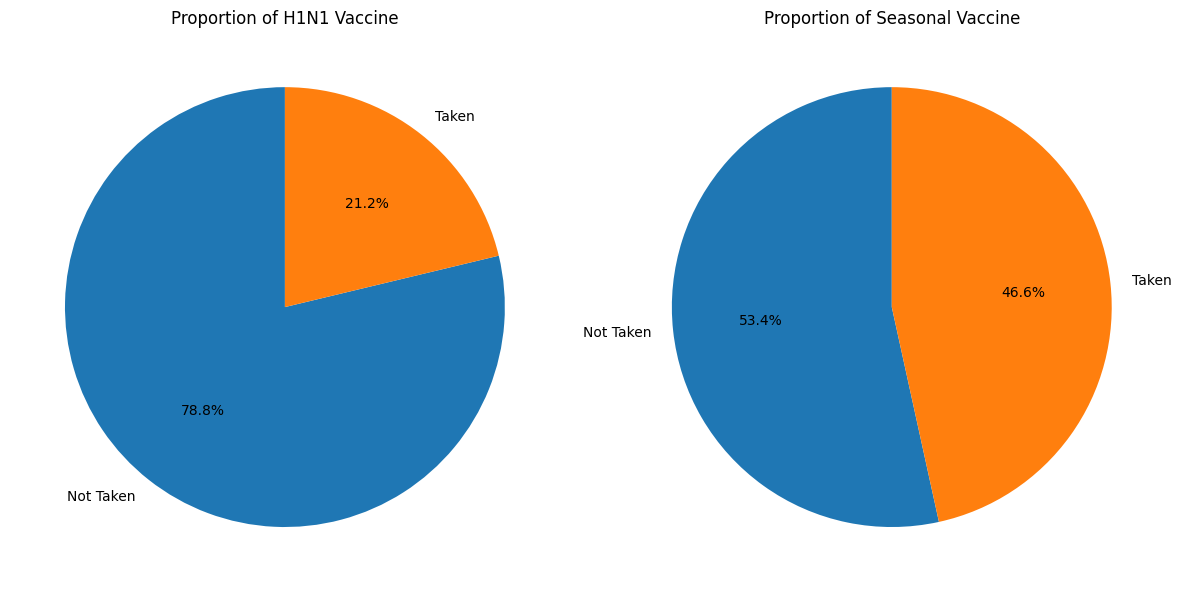

In [ ]:
# Plotting the proportion of both vaccines
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Proportion of H1N1 Vaccine
h1n1_counts = labels_df['h1n1_vaccine'].value_counts(normalize=True)
ax[0].pie(h1n1_counts, labels=h1n1_counts.index.map({0: 'Not Taken', 1: 'Taken'}), autopct='%1.1f%%', startangle=90)
ax[0].set_title("Proportion of H1N1 Vaccine")

# Proportion of Seasonal Vaccine
seasonal_counts = labels_df['seasonal_vaccine'].value_counts(normalize=True)
ax[1].pie(seasonal_counts, labels=seasonal_counts.index.map({0: 'Not Taken', 1: 'Taken'}), autopct='%1.1f%%', startangle=90)
ax[1].set_title("Proportion of Seasonal Vaccine")

plt.tight_layout()
plt.show()

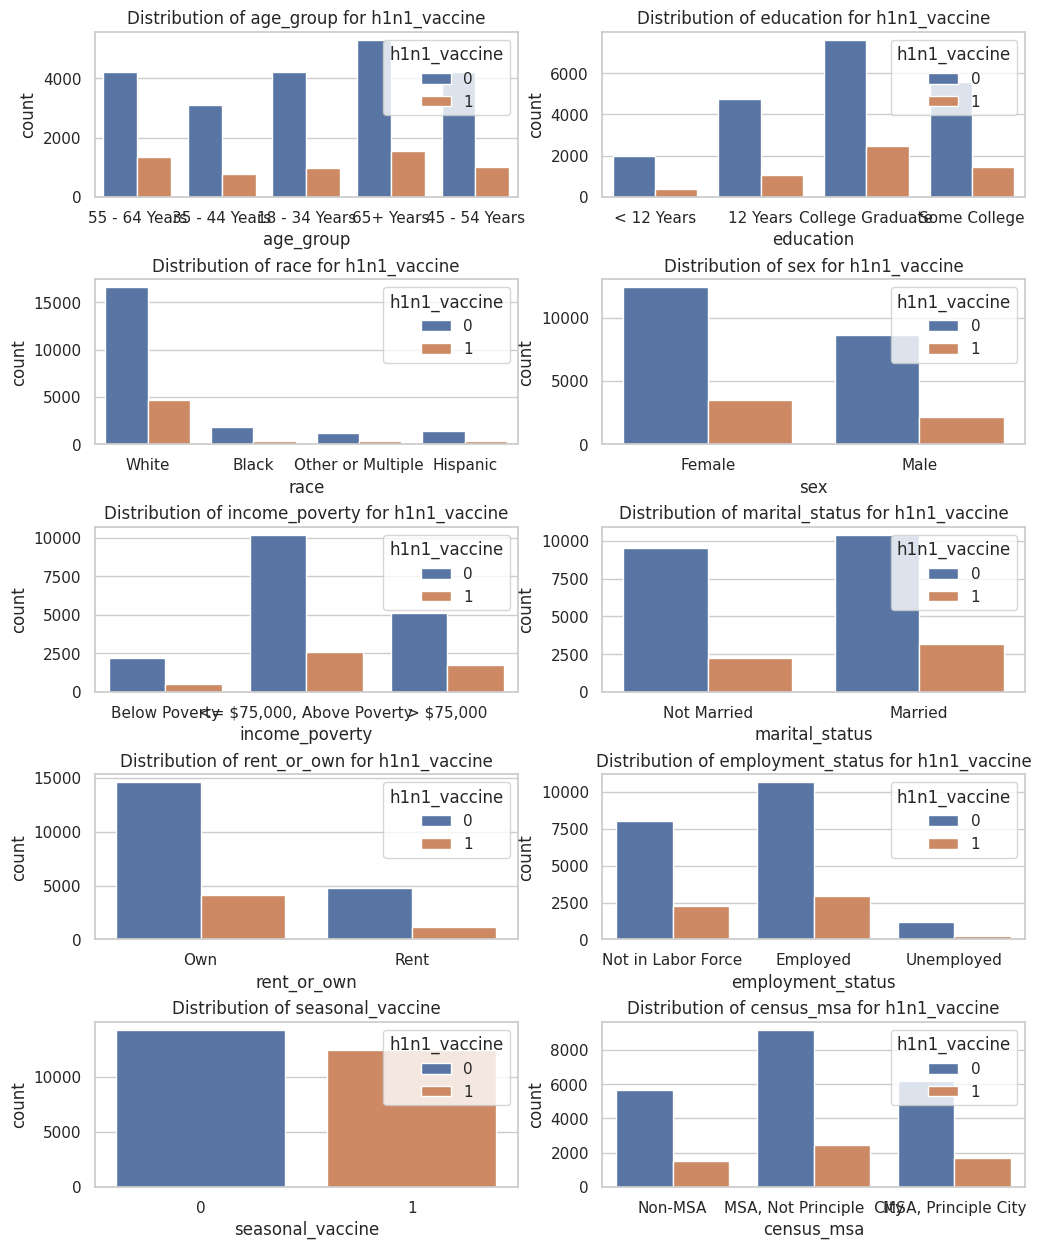

In [ ]:
# Define the categorical variables
df=joined_df
categorical_columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']

# Set up subplots for each categorical variable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 2)
    sns.countplot(x=column, hue='h1n1_vaccine', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column} for h1n1_vaccine')

# Additional plot for seasonal vaccine
sns.countplot(x='seasonal_vaccine', data=df, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of seasonal_vaccine')

plt.show()

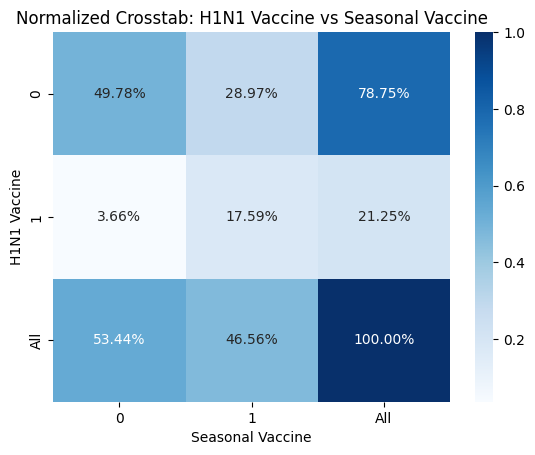

In [ ]:
# Create the cross-tabulation to show correlation of uptake of vaccine
cross_tab = pd.crosstab(
    labels_df["h1n1_vaccine"],
    labels_df["seasonal_vaccine"],
    margins=True,
    normalize=True
)

# Plotting the heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2%', cbar=True)
plt.title("Normalized Crosstab: H1N1 Vaccine vs Seasonal Vaccine")
plt.xlabel("Seasonal Vaccine")
plt.ylabel("H1N1 Vaccine")
plt.show()

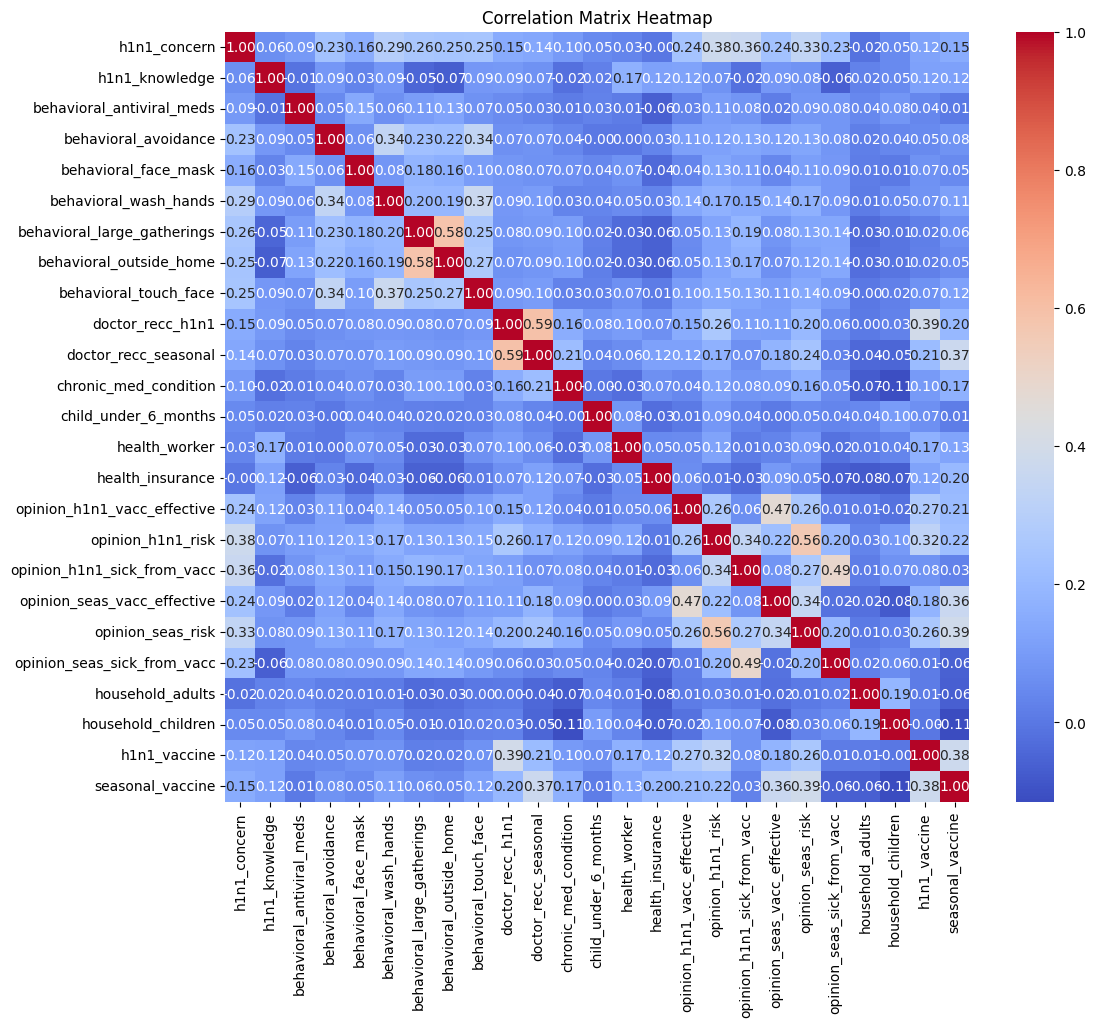

In [ ]:
#Correlating all other features to h1n1 vaccine and seasonal vaccine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation matrix
numeric_columns = joined_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


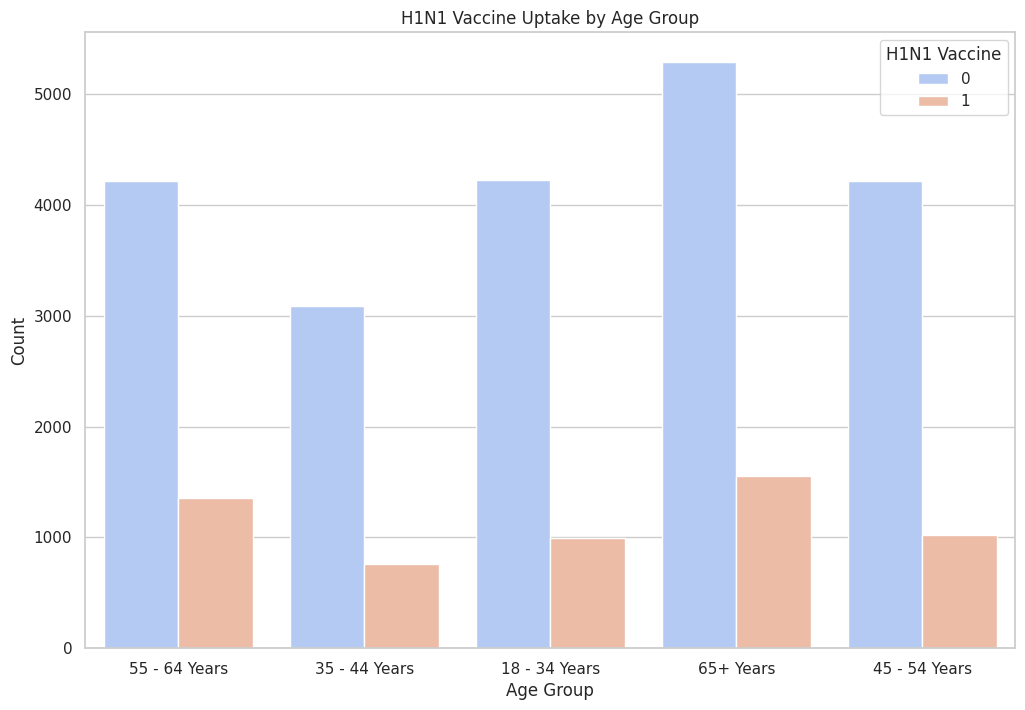

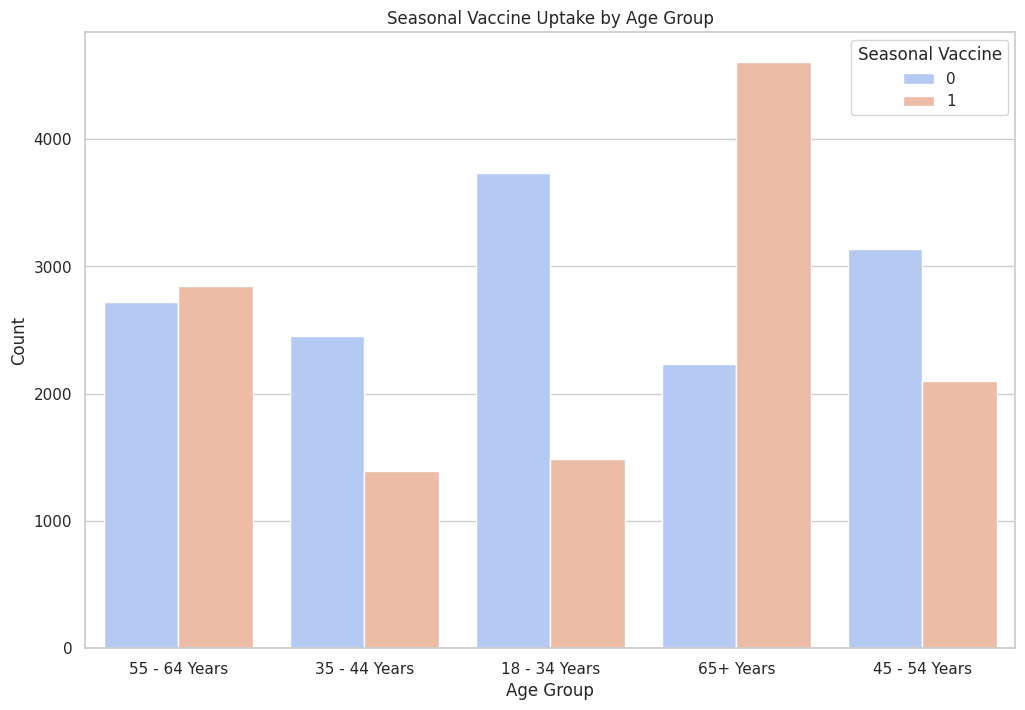

In [ ]:
#Plotting age group correlation with both the vaccines

#import seaborn as sns
import matplotlib.pyplot as plt


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for H1N1 vaccine uptake by age group
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='h1n1_vaccine', data=joined_df, palette='coolwarm')

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('H1N1 Vaccine Uptake by Age Group')

# Show the plot
plt.legend(title='H1N1 Vaccine', loc='upper right')
plt.show()

# Create a bar plot for seasonal vaccine uptake by age group
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='seasonal_vaccine', data=joined_df, palette='coolwarm')

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Seasonal Vaccine Uptake by Age Group')

# Show the plot
plt.legend(title='Seasonal Vaccine', loc='upper right')
plt.show()


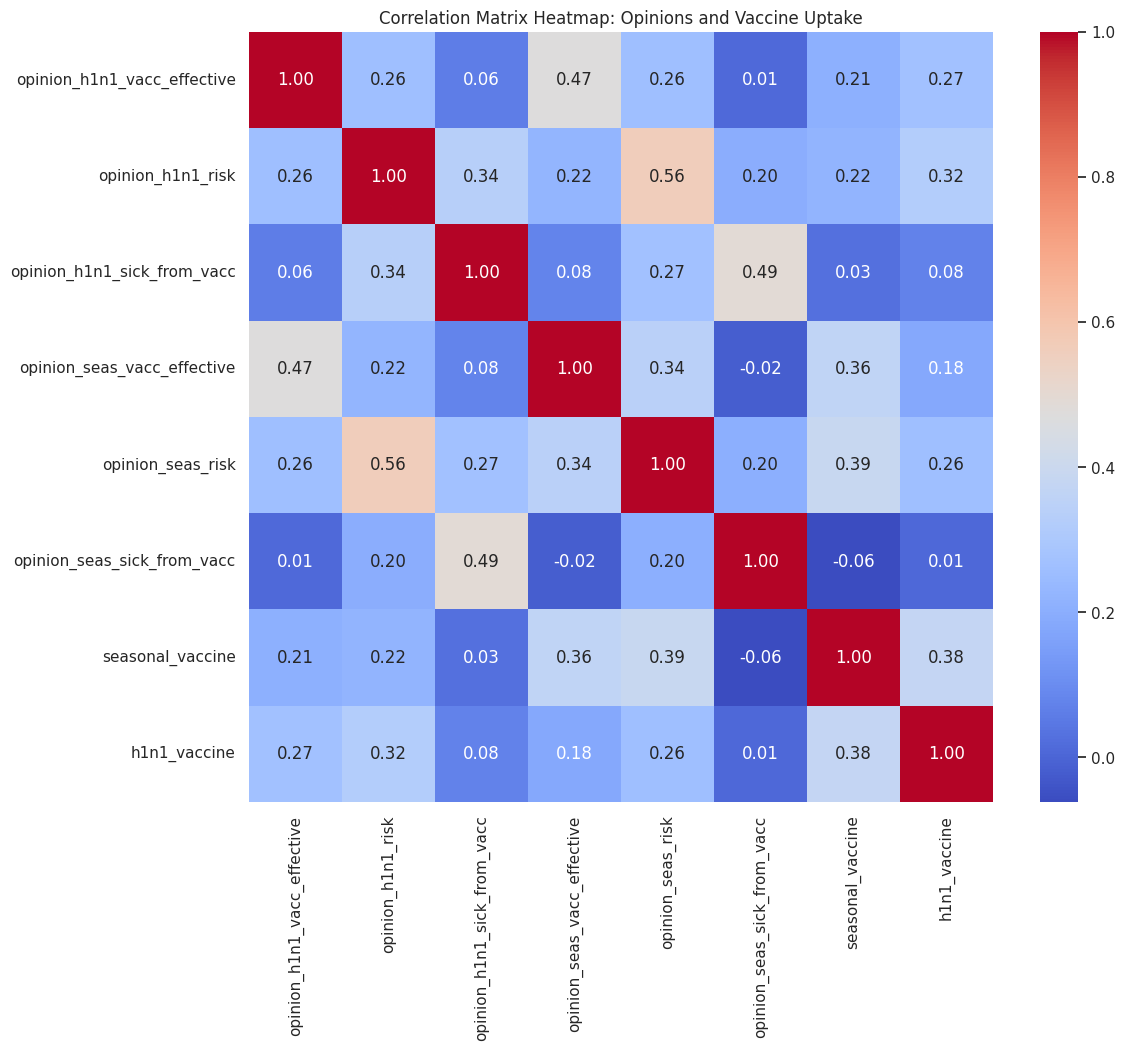

In [ ]:
#Plotting correlation of opinion and reccomendations, to see if they play major role in deciding to take the vaccine
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Selecting relevant columns for correlation matrix
opinion_and_vaccines = joined_df[
    ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
     'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
     'seasonal_vaccine', 'h1n1_vaccine']
]

# Compute the correlation matrix
correlation_matrix = opinion_and_vaccines.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title
plt.title('Correlation Matrix Heatmap: Opinions and Vaccine Uptake')

# Show the plot
plt.show()


In [ ]:
#plotting more variables
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()


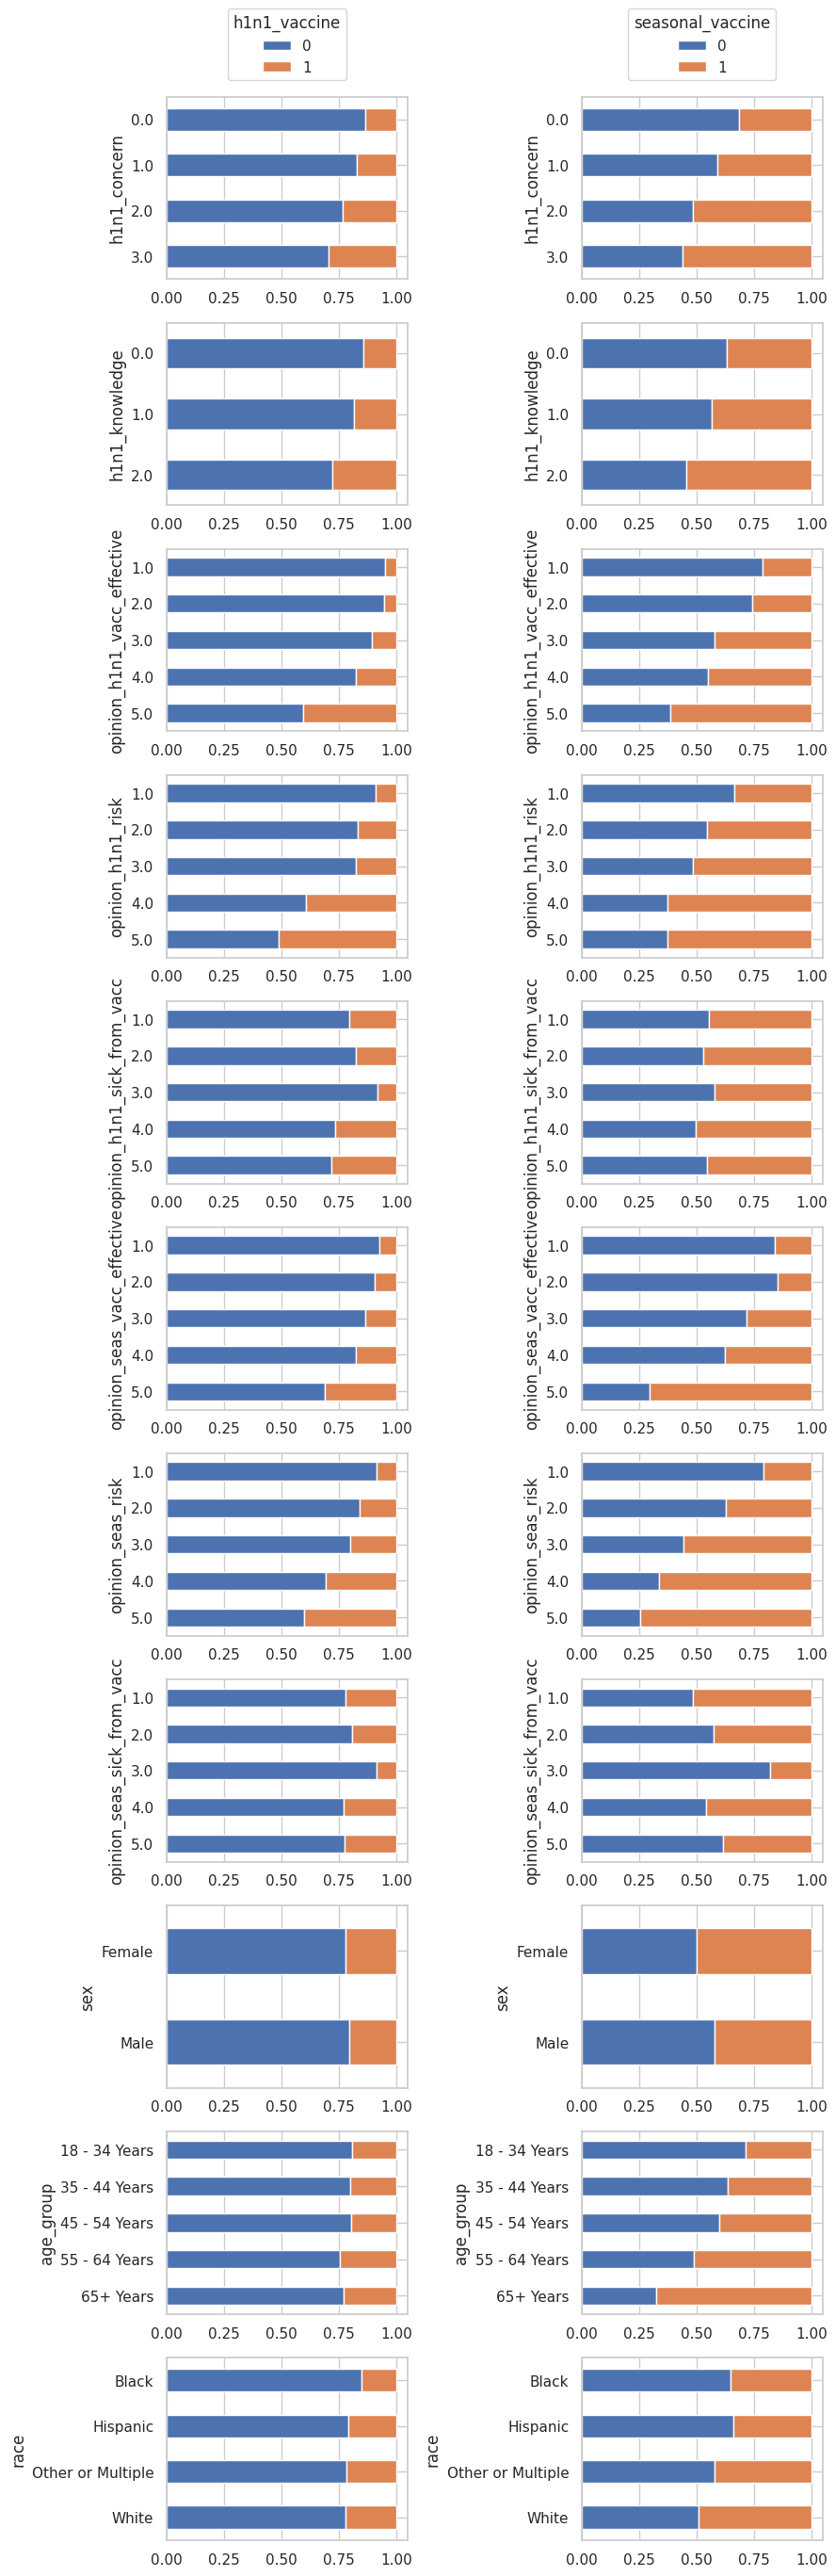

In [ ]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [ ]:
features_df.dtypes != "object"

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [ ]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [ ]:
# Chain preprocessing into a Pipeline object to run Logistic regression

numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [ ]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [ ]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [ ]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [ ]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 155 ms, sys: 80.4 ms, total: 236 ms
Wall time: 169 ms


[array([[0.70898963, 0.29101037],
        [0.9022304 , 0.0977696 ],
        [0.84459811, 0.15540189],
        ...,
        [0.92338263, 0.07661737],
        [0.89632521, 0.10367479],
        [0.92787943, 0.07212057]]),
 array([[0.52721977, 0.47278023],
        [0.61838467, 0.38161533],
        [0.37024394, 0.62975606],
        ...,
        [0.85936904, 0.14063096],
        [0.77843342, 0.22156658],
        [0.15115096, 0.84884904]])]

In [ ]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.291010,0.472780
16516,0.097770,0.381615
3106,0.155402,0.629756
16981,0.661791,0.857876
19111,0.284478,0.776927


In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

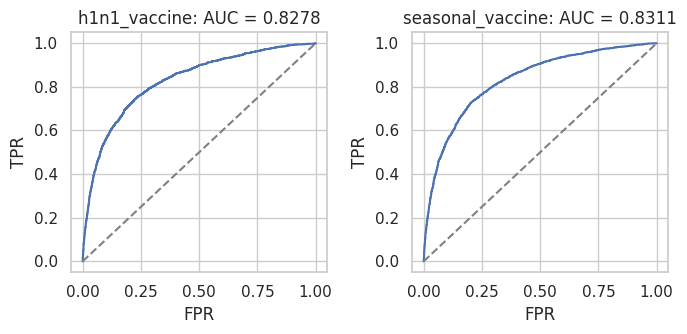

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
#Logistic Regression with Hyperparameter Tuning to get a better ROC

from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimators__estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'preprocessor__numeric__simple_imputer__strategy': ['mean', 'median', 'most_frequent']
}

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Best Parameters: {'estimators__estimator__C': 0.1, 'preprocessor__numeric__simple_imputer__strategy': 'mean'}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outsid...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.1)))])

In [ ]:
# Predict on evaluation set using the best model

best_preds = best_model.predict_proba(X_eval)

# Create a DataFrame for the predictions
best_y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": best_preds[0][:, 1],
        "seasonal_vaccine": best_preds[1][:, 1],
    },
    index=y_eval.index
)

# Display the shape and head of the predictions DataFrame
print("best_y_preds.shape:", best_y_preds.shape)
print(best_y_preds.head())


best_y_preds.shape: (8814, 2)
               h1n1_vaccine  seasonal_vaccine
respondent_id                                
6728               0.329101          0.573095
16516              0.092188          0.351440
3106               0.147312          0.600713
16981              0.669606          0.860441
19111              0.332031          0.827388


In [ ]:
# BEST AUC ROC based on grid search
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC scores for each target variable
roc_auc_h1n1 = roc_auc_score(y_eval['h1n1_vaccine'], best_y_preds['h1n1_vaccine'])
roc_auc_seasonal = roc_auc_score(y_eval['seasonal_vaccine'], best_y_preds['seasonal_vaccine'])

# Print the ROC AUC scores
print("ROC AUC for h1n1_vaccine:", roc_auc_h1n1)
print("ROC AUC for seasonal_vaccine:", roc_auc_seasonal)


ROC AUC for h1n1_vaccine: 0.831550667373377
ROC AUC for seasonal_vaccine: 0.8315207471970798


In [ ]:
%time

full_pipeline.fit(features_df, labels_df)

None   #

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 7.63 µs


In [ ]:
# Run the model to make predictions on actual test dataset
test_features_df = pd.read_csv("test_set_features.csv",
                               index_col="respondent_id")

In [ ]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.87280333, 0.12719667],
        [0.94475602, 0.05524398],
        [0.62906951, 0.37093049],
        ...,
        [0.80411015, 0.19588985],
        [0.9492446 , 0.0507554 ],
        [0.38421362, 0.61578638]]),
 array([[0.57359831, 0.42640169],
        [0.92876678, 0.07123322],
        [0.3626162 , 0.6373838 ],
        ...,
        [0.59872448, 0.40127552],
        [0.68003071, 0.31996929],
        [0.35787941, 0.64212059]])]

In [ ]:
# LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()

# Create the pipeline with LDA
lda_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MultiOutputClassifier(lda_model))
])

# Train the LDA model
lda_pipeline.fit(X_train, y_train)

# Predict on the evaluation set
preds_proba = lda_pipeline.predict_proba(X_eval)

y_preds_lda = pd.DataFrame(
    {
        "h1n1_vaccine": preds_proba[0][:, 1],
        "seasonal_vaccine": preds_proba[1][:, 1]
    },
    index=y_eval.index
)
print("y_preds_lda.shape:", y_preds_lda.shape)
y_preds_lda.head()

y_preds_lda.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.390354,0.486749
16516,0.074534,0.361235
3106,0.142400,0.644929
16981,0.727344,0.854930
19111,0.240788,0.773136


In [ ]:
lda_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('classifier',
                 MultiOutputClassifier(estimator=LinearDiscriminantAnalysis()))])

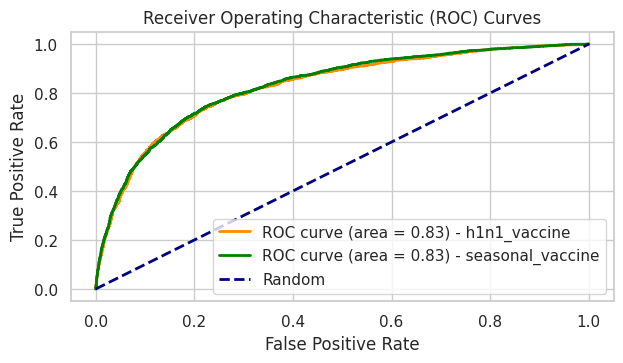

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

true_labels_h1n1 = y_eval["h1n1_vaccine"].values
predicted_probabilities_h1n1 = preds_proba[0]

true_labels_seasonal = y_eval["seasonal_vaccine"].values
predicted_probabilities_seasonal = preds_proba[1]

# Compute ROC curves
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(true_labels_h1n1, predicted_probabilities_h1n1[:, 1])
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(true_labels_seasonal, predicted_probabilities_seasonal[:, 1])
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC curves
plt.figure(figsize=(7, 3.5))

# ROC curve for "h1n1_vaccine"
plt.plot(fpr_h1n1, tpr_h1n1, color='darkorange', lw=2, label='ROC curve (area = {:.2f}) - h1n1_vaccine'.format(roc_auc_h1n1))

# ROC curve for "seasonal_vaccine"
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label='ROC curve (area = {:.2f}) - seasonal_vaccine'.format(roc_auc_seasonal))

# Random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()



In [ ]:
# Running the LDA model on actual test data set
test_probas = lda_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.9300697 , 0.0699303 ],
        [0.96289366, 0.03710634],
        [0.71433285, 0.28566715],
        ...,
        [0.83549313, 0.16450687],
        [0.95083888, 0.04916112],
        [0.36584096, 0.63415904]]),
 array([[0.628396  , 0.371604  ],
        [0.9295853 , 0.0704147 ],
        [0.40093079, 0.59906921],
        ...,
        [0.61381592, 0.38618408],
        [0.65838597, 0.34161403],
        [0.38183805, 0.61816195]])]

In [ ]:
#QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()

# Create the pipeline with QDA
qda_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MultiOutputClassifier(qda_model))
])

# Train the QDA model
qda_pipeline.fit(X_train, y_train)

# Predict on the evaluation set
preds_proba = qda_pipeline.predict_proba(X_eval)

y_preds_qda = pd.DataFrame(
    {
        "h1n1_vaccine": preds_proba[0][:, 1],
        "seasonal_vaccine": preds_proba[1][:, 1]
    },
    index=y_eval.index
)
print("y_preds_qda.shape:", y_preds_qda.shape)
y_preds_qda.head()


y_preds_qda.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.344871,0.519271
16516,0.021459,0.302509
3106,0.016465,0.313718
16981,0.978555,0.958820
19111,0.269627,0.704720


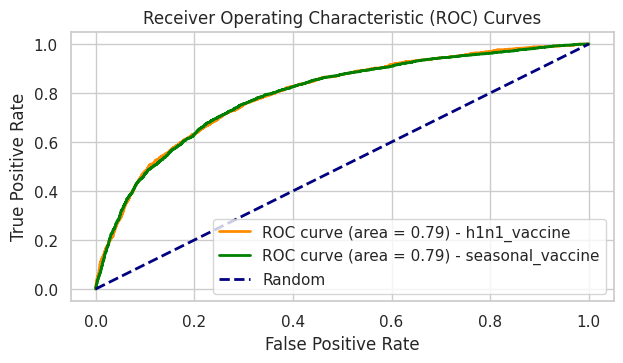

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


true_labels_h1n1 = y_eval["h1n1_vaccine"].values
predicted_probabilities_h1n1 = preds_proba[0]

true_labels_seasonal = y_eval["seasonal_vaccine"].values
predicted_probabilities_seasonal = preds_proba[1]

# Compute ROC curves
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(true_labels_h1n1, predicted_probabilities_h1n1[:, 1])
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(true_labels_seasonal, predicted_probabilities_seasonal[:, 1])
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC curves
plt.figure(figsize=(7, 3.5))

# ROC curve for "h1n1_vaccine"
plt.plot(fpr_h1n1, tpr_h1n1, color='darkorange', lw=2, label='ROC curve (area = {:.2f}) - h1n1_vaccine'.format(roc_auc_h1n1))

# ROC curve for "seasonal_vaccine"
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label='ROC curve (area = {:.2f}) - seasonal_vaccine'.format(roc_auc_seasonal))

# Random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Running the QDA model on actual test set
test_probas = qda_pipeline.predict_proba(test_features_df)

# Access the probabilities for each class
preds_proba_h1n1_test = test_probas[0][:, 1]
preds_proba_seasonal_test = test_probas[1][:, 1]

# Create a DataFrame for the test set predictions
test_preds_df = pd.DataFrame(
    {
        "h1n1_vaccine": preds_proba_h1n1_test,
        "seasonal_vaccine": preds_proba_seasonal_test
    },
    index=test_features_df.index
)

# Display the shape and head of the test set predictions DataFrame
print("test_preds_df.shape:", test_preds_df.shape)
print(test_preds_df.head())


test_preds_df.shape: (26708, 2)
               h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.041387      3.090326e-01
26708              0.000193      7.815394e-07
26709              0.844839      9.557159e-01
26710              0.600240      9.125724e-01
26711              0.995291      9.858510e-01


(26708, 35)

In [ ]:
#Classification tree

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=RANDOM_SEED)

# Create the pipeline with Decision Tree
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MultiOutputClassifier(dt_model))
])

# Define the hyperparameter grid
param_grid = {
    'classifier__estimator__max_depth': [None, 5, 15, 20],  # Adjust values as needed
    'classifier__estimator__min_samples_split': [2, 5, 10],    # Adjust values as needed
    'classifier__estimator__min_samples_leaf': [1, 2, 4]        # Adjust values as needed
}

# Perform GridSearchCV
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the evaluation set
preds_proba = best_model.predict_proba(X_eval)

y_preds_best_dt = pd.DataFrame(
    {
        "h1n1_vaccine": preds_proba[0][:, 1],
        "seasonal_vaccine": preds_proba[1][:, 1]
    },
    index=y_eval.index
)
print("y_preds_best_dt.shape:", y_preds_best_dt.shape)
y_preds_best_dt.head()


Best Parameters: {'classifier__estimator__max_depth': 5, 'classifier__estimator__min_samples_leaf': 2, 'classifier__estimator__min_samples_split': 2}
y_preds_best_dt.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.390863,0.400673
16516,0.077592,0.240120
3106,0.077592,0.448819
16981,0.588832,0.824621
19111,0.216110,0.841808


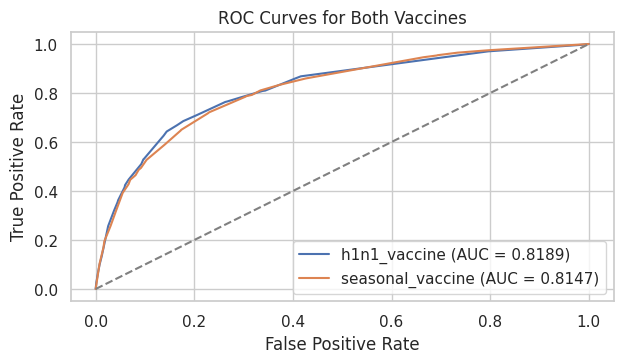

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict on the evaluation set using the best model
best_preds = best_model.predict_proba(X_eval)


preds_proba_h1n1 = best_preds[0][:, 1]
preds_proba_seasonal = best_preds[1][:, 1]

# Plot ROC curve for both vaccines
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_eval['h1n1_vaccine'], preds_proba_h1n1)
roc_auc_h1n1 = roc_auc_score(y_eval['h1n1_vaccine'], preds_proba_h1n1)

fpr_seasonal, tpr_seasonal, _ = roc_curve(y_eval['seasonal_vaccine'], preds_proba_seasonal)
roc_auc_seasonal = roc_auc_score(y_eval['seasonal_vaccine'], preds_proba_seasonal)

plt.figure(figsize=(7, 3.5))

# Plot ROC curve for h1n1_vaccine
plt.plot(fpr_h1n1, tpr_h1n1, label=f'h1n1_vaccine (AUC = {roc_auc_h1n1:.4f})')

# Plot ROC curve for seasonal_vaccine
plt.plot(fpr_seasonal, tpr_seasonal, label=f'seasonal_vaccine (AUC = {roc_auc_seasonal:.4f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Both Vaccines')
plt.legend()

plt.show()


In [ ]:
# Running classification tree on the actual test set
test_probas = best_model.predict_proba(test_features_df)

# Access the probabilities for each class
preds_proba_h1n1_test = test_probas[0][:, 1]
preds_proba_seasonal_test = test_probas[1][:, 1]

# Create a DataFrame for the test set predictions
test_preds_df = pd.DataFrame(
    {
        "h1n1_vaccine": preds_proba_h1n1_test,
        "seasonal_vaccine": preds_proba_seasonal_test
    },
    index=test_features_df.index
)

# Display the shape and head of the test set predictions DataFrame
print("test_preds_df.shape:", test_preds_df.shape)
print(test_preds_df.head())


test_preds_df.shape: (26708, 2)
               h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.158661          0.389860
26708              0.036481          0.083560
26709              0.436027          0.746231
26710              0.390863          0.822095
26711              0.378378          0.737255


In [ ]:
# Neural net

from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

# Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(20, 40), max_iter=1000)  # Example architecture, adjust as needed

# Create the pipeline with Neural Network
nn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MultiOutputClassifier(nn_model))
])

# Train the Neural Network model
nn_pipeline.fit(X_train, y_train)

# Predict on the evaluation set
preds_proba = nn_pipeline.predict_proba(X_eval)

y_preds_nn = pd.DataFrame(
    {
        "h1n1_vaccine": preds_proba[0][:, 1],
        "seasonal_vaccine": preds_proba[1][:, 1]
    },
    index=y_eval.index
)
print("y_preds_nn.shape:", y_preds_nn.shape)
y_preds_nn.head()


y_preds_nn.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.096770,0.358025
16516,0.099600,0.189312
3106,0.189320,0.535871
16981,0.852289,0.871381
19111,0.394001,0.857935


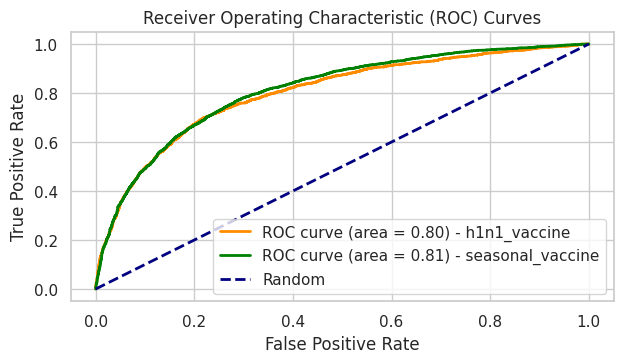

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

true_labels_h1n1 = y_eval["h1n1_vaccine"].values
predicted_probabilities_h1n1 = preds_proba[0]

true_labels_seasonal = y_eval["seasonal_vaccine"].values
predicted_probabilities_seasonal = preds_proba[1]

# Compute ROC curves
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(true_labels_h1n1, predicted_probabilities_h1n1[:, 1])
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(true_labels_seasonal, predicted_probabilities_seasonal[:, 1])
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC curves
plt.figure(figsize=(7, 3.5))

# ROC curve for "h1n1_vaccine"
plt.plot(fpr_h1n1, tpr_h1n1, color='darkorange', lw=2, label='ROC curve (area = {:.2f}) - h1n1_vaccine'.format(roc_auc_h1n1))

# ROC curve for "seasonal_vaccine"
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label='ROC curve (area = {:.2f}) - seasonal_vaccine'.format(roc_auc_seasonal))

# Random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()



In [ ]:
# Running the neural net model on actual test set
test_probas = nn_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.90728774, 0.09271226],
        [0.97161503, 0.02838497],
        [0.60277151, 0.39722849],
        ...,
        [0.89382812, 0.10617188],
        [0.99709911, 0.00290089],
        [0.3774863 , 0.6225137 ]]),
 array([[0.33256237, 0.66743763],
        [0.98158452, 0.01841548],
        [0.3830951 , 0.6169049 ],
        ...,
        [0.80130434, 0.19869566],
        [0.78510964, 0.21489036],
        [0.29809834, 0.70190166]])]

In [ ]:
#Running Random forest, Gradient boosting, SVM and logistic regression models one after the other in a loop to get a summarized conclusion of ROC AUC values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Splitting the data
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df['h1n1_vaccine'],
    test_size=0.33,
    shuffle=True,
    stratify=labels_df['h1n1_vaccine'],
    random_state=RANDOM_SEED
)

# Define numeric columns and preprocessing steps
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
numeric_preprocessing = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessor for numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_preprocessing, numeric_cols)
    ],
    remainder='drop'
)

# Models to test
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=RANDOM_SEED)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_SEED)),
    ('SVM', SVC(probability=True))
]

for name, model in models:
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate accuracy
    accuracy = accuracy_score(y_eval, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')


Logistic Regression Accuracy: 0.8322
Random Forest Accuracy: 0.8228
Gradient Boosting Accuracy: 0.8363
SVM Accuracy: 0.8336


In [ ]:
 #chain preprocessing into a Pipeline object

numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)


In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [ ]:
#Since we get the highest ROC AUC values from Gradient boosting, we will go ahead with this classifier

from sklearn.ensemble import GradientBoostingClassifier

# Set up the classifier with desired hyperparameters for tuning
classifiers = MultiOutputClassifier(
    estimator=GradientBoostingClassifier()
)

# Construct the full pipeline
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifiers", classifiers),
])

# Train the model
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('classifiers',
                 MultiOutputClassifier(estimator=GradientBoostingClassifier()))])

In [ ]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 3.63 s, sys: 11.8 ms, total: 3.64 s
Wall time: 3.64 s


[array([[0.70719998, 0.29280002],
        [0.88422103, 0.11577897],
        [0.89324223, 0.10675777],
        ...,
        [0.92257921, 0.07742079],
        [0.90583805, 0.09416195],
        [0.94942649, 0.05057351]]),
 array([[0.54631874, 0.45368126],
        [0.62945583, 0.37054417],
        [0.46074095, 0.53925905],
        ...,
        [0.85689369, 0.14310631],
        [0.78489757, 0.21510243],
        [0.10487112, 0.89512888]])]

In [ ]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)

print("y_preds.shape:", y_preds.shape)
y_preds.head()


y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.292800,0.453681
16516,0.115779,0.370544
3106,0.106758,0.539259
16981,0.740622,0.898167
19111,0.312349,0.832046


In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

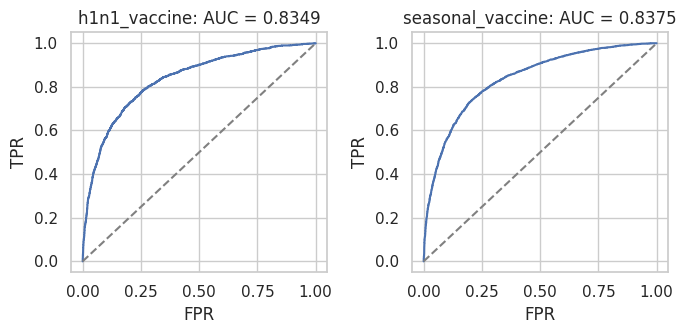

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval, y_preds)


0.8362104962898167

In [ ]:
%%time

full_pipeline.fit(features_df, labels_df)

None

CPU times: user 6.43 s, sys: 16 ms, total: 6.45 s
Wall time: 6.51 s


In [ ]:
test_features_df = pd.read_csv("test_set_features.csv",
                               index_col="respondent_id")

In [ ]:
#Running the gradient boosting model on actual test set
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.88973895, 0.11026105],
        [0.96018384, 0.03981616],
        [0.66359435, 0.33640565],
        ...,
        [0.84796232, 0.15203768],
        [0.94685873, 0.05314127],
        [0.39807707, 0.60192293]]),
 array([[0.60772357, 0.39227643],
        [0.94988512, 0.05011488],
        [0.24578263, 0.75421737],
        ...,
        [0.5288419 , 0.4711581 ],
        [0.6688806 , 0.3311194 ],
        [0.31026803, 0.68973197]])]

In [ ]:
#Create submission file as required
submission_df = pd.read_csv("submission_format.csv",
                            index_col="respondent_id")

In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values,
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.110261,0.392276
26708,0.039816,0.050115
26709,0.336406,0.754217
26710,0.512156,0.786017
26711,0.276607,0.526266


In [ ]:
submission_df.to_csv('my_submission.csv', index=True)


In [ ]:
!head my_submission.csv


respondent_id,h1n1_vaccine,seasonal_vaccine
26707,0.11026104891480097,0.39227643089696485
26708,0.03981615663200792,0.050114882568183146
26709,0.3364056472893206,0.7542173747984113
26710,0.5121561304388965,0.786017289917627
26711,0.2766071521494598,0.5262659168761216
26712,0.537058017730361,0.9328084823585814
26713,0.3118608090017421,0.4464905280892166
26714,0.09013394913167717,0.1617674130391423
26715,0.03391455974801213,0.1348047306617065
